In [1]:
import pyhf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
class custom_modifier_add(object):
    op_code = 'addition'
    name = 'custom_modifier_add'
    def __init__(self,name = 'name'):
        self.required_parsets = {
            'mean': {
                'paramset_type': pyhf.parameters.paramsets.unconstrained,
                'n_parameters': 1,
                'is_constrained': False,
                'is_shared': True,
                'inits': (0.0,),
                'bounds': ((-5, 5),),
                'fixed': False
        }}
    def apply(self,pars):
        base = np.zeros((1,len(m.config.samples),1,sum(m.config.channel_nbins.values())))

        bins = np.linspace(-5,5,20+1)
        mean = pars[self.config.par_slice('mean')][0]
        yields = 100*(scipy.stats.norm(loc = mean).cdf(bins[1:]) - scipy.stats.norm(loc = mean).cdf(bins[:-1]))
        base[0,self.config.samples.index('signal'),0,:] = yields
        return base

class custom_modifier_mult(object):
    op_code = 'multiplication'
    name = 'custom_modifier_mult'
    def __init__(self,name = 'name'):
        self.required_parsets = {
            'mean': {
                'paramset_type': pyhf.parameters.paramsets.unconstrained,
                'n_parameters': 1,
                'is_constrained': False,
                'is_shared': True,
                'inits': (0.0,),
                'bounds': ((-5, 5),),
                'fixed': False
        }}
    def apply(self,pars):
        base = np.ones((1,len(m.config.samples),1,sum(m.config.channel_nbins.values())))

        bins = np.linspace(-5,5,20+1)
        mean = pars[self.config.par_slice('mean')][0]
        yields = 100*(scipy.stats.norm(loc = mean).cdf(bins[1:]) - scipy.stats.norm(loc = mean).cdf(bins[:-1]))
        base[0,self.config.samples.index('signal'),0,:] = yields
        return base



m = pyhf.Model(
{'channels': [{'name': 'singlechannel',
   'samples': [{'name': 'signal',
     'data': [0]*20,
     'modifiers': [{'name': 'mu', 'type': 'normfactor', 'data': None}]},
    {'name': 'background',
     'data': [300]*20,
     'modifiers': []}]}]},
    custom_modifiers=[custom_modifier_add()]
)
bp = pyhf.tensorlib.astensor(m.config.suggested_init())
bp[m.config.poi_index] = 5
bp[m.config.par_slice('mean')] = [3.0]
d = m.make_pdf(bp).sample()

In [3]:
bestfit = pyhf.infer.mle.fit(d,m)
print(bestfit[m.config.par_slice('mean')])
print(bestfit[m.config.par_slice('mu')])


[3.26454866]
[5.47176576]


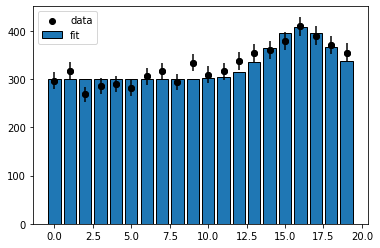

In [4]:
plt.bar(np.arange(20),m.expected_actualdata(bestfit), alpha = 1.0, facecolor = None, edgecolor = 'k', label = 'fit')
plt.scatter(np.arange(20),d[:m.config.nmaindata], alpha = 1.0, marker = 'o', c='k', label = 'data', zorder=99)
plt.errorbar(np.arange(20),d[:m.config.nmaindata],yerr=np.sqrt(d[:m.config.nmaindata]), marker='o', c='k', linestyle = '')
plt.legend()


In [ ]:
s